In [2]:
#We import the moduels needed for the project

import pandas as pd
import psycopg2


In [2]:
#We import the main Experts reviews file, not needed since we have the clean ones, so we comment it.
DataFrame_ExpertReviews = pd.read_excel(r"C:\Users\memwa\Desktop\Database Management\Partially cleaned data\ExpertReviewsClean43LIWC.xlsx")

In [3]:
#We import the main Users reviews file, not needed since we have the clean ones, so we comment it.
DataFrame_UserReviews = pd.read_excel(r"C:\Users\memwa\Desktop\Database Management\Partially cleaned data\UserReviewsClean43LIWC.xlsx")

In [8]:
#We import the MetaClean file into a pandas dataframe, it is not used in this code
dataFrame_MetaClean = pd.read_excel(r"C:\Users\Jaume\Documents\MDDB\Database Management\metaClean43Brightspace.xlsx")

In [19]:
#We import the Sales file into a pandas dataframe
dataFrame_Sales = pd.read_excel(r'C:\Users\memwa\Desktop\Database Management\Partially cleaned data\sales.xlsx')

In [7]:
#TO START CLEANING THE DATA, RUN THIS. DON'T RUN IF IT'S NOT THE FIRST TIME!!!! Here the big dataframe with the original file is cleaned and it is stored in a new dataframe, it is not needed anymore but we will leave it here to keep track of the cleaning process. 
cleanDataFrame_UserReviews = DataFrame_UserReviews[['url','reviewer', 'Rev','idvscore']]

In [9]:
#TO START CLEANING THE DATA, RUN THIS. DON'T RUN IF IT'S NOT THE FIRST TIME!!!! IT WILL AFFECT THE EXISTING FILE, ONLY IF IT IS THE FIRST TIME RUNNING THE CODE

#Here we will select the film name that appears in all the url of the reviews
movieColumn = cleanDataFrame_UserReviews['url']
movieNames = []

#We go through all the list of urls
for movie in movieColumn:
    #We split the url by the '/' character
    movieName = movie.split('/')
    #We keep the last position of the list
    movieTemp = movieName[-1]
    #We append this last position to the list created
    movieNames.append(movieTemp)
    
#We attach the new list to the pandas dataframe    
cleanDataFrame_UserReviews['movies'] = movieNames 

# Define the file path for the Excel file including the extension '.xlsx'
excel_file_path = 'C:/Users/memwa/Desktop/Database Management/Partially cleaned data/cleanDataFrame_UserReviews.xlsx'

# Export the DataFrame to Excel
cleanDataFrame_UserReviews.to_excel(excel_file_path, index=False)

#We have successfully stored a new file that is much smaller and will take a lot less time to upload
print(f"DataFrame exported to '{excel_file_path}' successfully.")

C:\Users\memwa\AppData\Local\Temp\ipykernel_7064\1683727123.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanDataFrame_UserReviews['movies'] = movieNames


DataFrame exported to 'C:/Users/memwa/Desktop/Database Management/Partially cleaned data/cleanDataFrame_UserReviews.xlsx' successfully.


In [5]:
#RUN THIS IF YOU HAVE ALREADY THE CLEAN REVIEW FILES!!!!! We import the cleaned file, it is faster this way and we only need some columns of the original one
cleanDataFrame_UserReviews = pd.read_excel(r'C:/Users/memwa/Desktop/Database Management/Partially cleaned data/cleanDataFrame_UserReviews.xlsx')

In [11]:
#TO START CLEANING THE DATA, RUN THIS. DON'T RUN IF IT'S NOT THE FIRST TIME!!!! Here the big dataframe with the original file is cleaned and it is stored in a new dataframe, it is not needed anymore but we will leave it here to keep track of the cleaning process. 
cleanDataFrame_ExpertReviews = DataFrame_ExpertReviews[['url','reviewer', 'Rev','idvscore']]


In [7]:
#TO START CLEANING THE DATA, RUN THIS. DON'T RUN IF IT'S NOT THE FIRST TIME!!!! This cell divides the score that the expert reviews file has because it is out of a 100 instead of out of 10 like the user scores.

#we create an empty list to store the recalculated scores
scores_Summarized = []

#first loop is taking each row of the file, recalculate it and attach it to the list
for review_score in cleanDataFrame_ExpertReviews['idvscore']:
    newScore = review_score / 10
    scores_Summarized.append(newScore) 

#second loop, it goes through all the reviews and assigns the score one by one, it didn't input the correct type if I did it directly
for index,row in cleanDataFrame_ExpertReviews.iterrows():
    #we assign the new score value to each expert review
    cleanDataFrame_ExpertReviews.at[index, 'idvscore'] = scores_Summarized[index]

In [8]:
#TO START CLEANING THE DATA, RUN THIS. DON'T RUN IF IT'S NOT THE FIRST TIME!!!! IT WILL AFFECT THE EXISTING FILE!!!!

#Here we will select the film name that appears in all the url of the reviews
movieColumn = cleanDataFrame_ExpertReviews['url']
movieNames = []

#We go through all the list of urls
for movie in movieColumn:
    #We split the url by the '/' character
    movieName = movie.split('/')
    #We keep the last position of the list
    movieTemp = movieName[-1]
    #We append this last position to the list created
    movieNames.append(movieTemp)
    
#We attach the new list to the pandas dataframe       
cleanDataFrame_ExpertReviews['movies'] = movieNames 

# Define the file path for the Excel file including the extension '.xlsx'
excel_file_path = 'C:/Users/memwa/Desktop/Database Management/Partially cleaned data/cleanDataFrame_ExpertReviews.xlsx'

# Export the DataFrame to Excel
cleanDataFrame_ExpertReviews.to_excel(excel_file_path, index=False)

#We have successfully stored a new file that is much smaller and will take a lot less time to upload
print(f"DataFrame exported to '{excel_file_path}' successfully.")

DataFrame exported to 'C:/Users/memwa/Desktop/Database Management/Partially cleaned data/cleanDataFrame_ExpertReviews.xlsx' successfully.


In [6]:
##RUN THIS IF YOU HAVE ALREADY THE CLEAN REVIEW FILES!!!!! We import the cleaned file, it is faster this way and we only need some columns of the original one
cleanDataFrame_ExpertReviews = pd.read_excel(r"C:/Users/memwa/Desktop/Database Management/Partially cleaned data/cleanDataFrame_ExpertReviews.xlsx")

In [9]:
#Now we add the two clean review tables and we make it one
for index,row in cleanDataFrame_UserReviews.iterrows():
    #we cast every score value that is an integer and we make it a float, since in the Sql table, this value is defined as a float
    if(type(cleanDataFrame_UserReviews.at[index, 'idvscore'])== int):
        cleanDataFrame_UserReviews.at[index, 'idvscore'] = float(cleanDataFrame_UserReviews.at[index, 'idvscore'])
    #if the score value isn't an integer, it means that is a NULL value, we assign NONE to avoid type errors
    else:
        cleanDataFrame_UserReviews.at[index, 'idvscore'] = None 

#We merge the two review tables together
frames = [cleanDataFrame_UserReviews,cleanDataFrame_ExpertReviews]
clean_ReviewsTable = pd.concat(frames, ignore_index=True)


In [20]:
#We import the interesting columns for our analysis.
cleanDataFrame_Sales = dataFrame_Sales[['url','year','release_date','genre','international_box_office','domestic_box_office','worldwide_box_office ','production_budget']]

#We repeat the same process for the urls, this way we can match the movies with the reviews later on
movieColumn = cleanDataFrame_Sales['url']
movieNames = []

#We go through all the list of urls
for movie in movieColumn:
    #We split the url by the '/' character
    movieName = movie.split('/')
    #We keep the last position of the list
    movieTemp = movieName[-1]
    #We append this last position to the list created
    movieNames.append(movieTemp)
    
#We attach the list into a new column named movies    
cleanDataFrame_Sales['movies'] = movieNames 


C:\Users\memwa\AppData\Local\Temp\ipykernel_13032\4177055393.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanDataFrame_Sales['movies'] = movieNames


In [ ]:
#We try to connect to postgresql
import psycopg2

#Database connection parameters
db_params = {
    'host': 'localhost',
    'port': '5433',
    'database': 'Movie Database',
    'user': 'postgres',
    'password': 'Reves360'
}

#Establish a connection to the PostgreSQL server
connection = psycopg2.connect(**db_params)

#Create a cursor object to interact with the database
cursor = connection.cursor()

#We make a loop to go through the entire dataframe
for index,row in cleanDataFrame_Sales.iterrows():
    #We write the sql query that will input the data to the tables
    insert_query = "INSERT INTO Movies (movie_id, movie_title, production_budget, worldwide_boxoffice, release_year, release_day) VALUES (%s, %s, %s, %s, %s, %s)"
    #We define the values to insert
    values = (index, row['movies'], row['production_budget'], row['worldwide_box_office'], row['year'], row['release_date'])
    #We execute the query with the specified values
    cursor.execute(insert_query, values)

# Commit any changes to the database (if applicable)
connection.commit()

# Close the cursor and connection
cursor.close()
connection.close()
print("Connection Done")




In [21]:
#We create a dictionary that will contain the movie id for each movie in the sales file
movie_id_dictionary = {}

#We make a loop that will go through all the movies and assign a value to each new movie
id = 1
for movie in cleanDataFrame_Sales['movies']:
    #we check if we have already seen the film, if not, we add it to the dictionary
    if movie not in movie_id_dictionary.keys():
        movie_id_dictionary[movie.lower()] = id
        #we increase the id to assign a new value to the next new movie
        id+=1    

print(movie_id_dictionary)
   

{'bakha-satang-(s-korea)': 1, 'antitrust': 2, 'santitos': 3, 'frank-mcklusky-c-i': 4, 'walk-to-remember-a': 5, 'zig-zag': 6, 'takhte-siah': 7, 'angry-monk-reflections-on-tibet-the': 8, '30-years-to-life': 9, 'killing-of-john-lennon-the': 10, 'mad-money': 11, 'little-chenier': 12, 'over-her-dead-body': 13, 'ano-em-que-meus-pais-sairam-de-ferias-o': 14, '120-(turkey)': 15, 'other-boleyn-girl-the': 16, 'lawyer-walks-into-a-bar-a': 17, 'rondine-la': 18, 'jodaeiye-nader-az-simin': 19, 'pariah-(2011)': 20, 'war-horse': 21, 'habemus-papam': 22, 'ivan-tsarevich-i-seryy-volk': 23, 'sicario-room-164-el': 24, 'extremely-loud-and-incredibly-close': 25, 'angels-crest': 26, 'paranormal-xperience-3d-(spain)-(2011)': 27, 'darkest-hour-the': 28, 'miss-minoes': 29, 'we-bought-a-zoo': 30, 'minuscule-la-vallee-des-fourmis-perdues-(france)': 31, 'kiseki': 32, 'in-the-land-of-blood-and-honey': 33, 'prince-of-the-himalayas': 34, 'don-2': 35, 'we-are-the-giant': 36, 'wang-pai-(china)(2014)': 37, 'young-kieslo

In [22]:
#We create an empty column, if I assigned the valued directly, it didn't take them the correct way and when I did the INSERT query there where errors.
clean_ReviewsTable['movie_id'] = None

#We go through the whole dataframe and assign the movie ids of the dictionary for each row
for index,row in clean_ReviewsTable.iterrows():
    #if there is a matching movie in the dictionary, we assign its id   
    if clean_ReviewsTable.at[index,'movies'] in movie_id_dictionary.keys():
        clean_ReviewsTable.at[index,'movie_id'] = movie_id_dictionary[clean_ReviewsTable.at[index,'movies']]
    #if there is no matching movie we assign the None value        
    else:
        clean_ReviewsTable.at[index,'movie_id'] = None
    

In [23]:
#we try to connect to postgresql
import psycopg2

# Database connection parameters
db_params = {
    'host': 'localhost',
    'port': '5433',
    'database': 'DBmovies',
    'user': 'postgres',
    'password': 'alex2000'
}


# Establish a connection to the PostgreSQL server
connection = psycopg2.connect(**db_params)

# Create a cursor object to interact with the database
cursor = connection.cursor()

#we go through all the rows in the reviews dataframe and we insert them all into sql
for index,row in clean_ReviewsTable.iterrows():
    insert_query = "INSERT INTO Reviews (review_id, review_content, rating, reviewer, movie_id, movie_title) VALUES (%s, %s, %s, %s, %s, %s)"
    # Define the values to insert
    values = (index, row['Rev'], row['idvscore'], row['reviewer'], row['movie_id'], row['movies'])
    # Execute the INSERT query with the specified values
    cursor.execute(insert_query, values)

# Commit any changes to the database (if applicable)
connection.commit()

# Close the cursor and connection
cursor.close()
connection.close()

print("Connection Done")


Connection Done


In [15]:
#DON'T RUN!!!! QUERY TO DELETE THE INFO IN THE REVIEWS TABLE FROM SQL!!!! IT IS HERE FOR TESTING PURPOSES!!!!

#we try to connect to postgresql
import psycopg2

# Database connection parameters
db_params = {
    'host': 'localhost',
    'port': '5433',
    'database': 'Movie Database',
    'user': 'postgres',
    'password': 'Reves360'
}


# Establish a connection to the PostgreSQL server
connection = psycopg2.connect(**db_params)

# Create a cursor object to interact with the database
cursor = connection.cursor()

insert_query = "DELETE FROM Reviews"
# Define the values to insert

# Execute the INSERT query with the specified values
cursor.execute(insert_query)

# Commit any changes to the database (if applicable)
connection.commit()

# Close the cursor and connection
cursor.close()
connection.close()

print("Connection Done")


Connection Done


In [ ]:
#mike
# Database connection parameters
db_params = {
    'dbname': 'databasemanagement',
    'user': 'postgres',
    'password': '0648396235',
    'host': '127.0.0.1',
    'port': '5433'
}

# Table names in PostgreSQL
table_name1 = 'sales'
table_name2 = 'metaclean'

# Connect to the PostgreSQL database
conn = psycopg2.connect(**db_params)
cursor = conn.cursor()

# Convert the DataFrames to a list of tuples (each tuple represents a row)
data_tuples1 = [tuple(row) for row in df1.to_records(index=False)]
data_tuples2 = [tuple(row) for row in df2.to_records(index=False)]

# Define the SQL queries to insert data into the existing tables
insert_query1 = f"""INSERT INTO {table_name1} (title, worldwide_box_office)
                   VALUES (%s, %s)"""

insert_query2 = f"""INSERT INTO {table_name2} (title, movie_cast)
                   VALUES (%s, %s)
                   ON CONFLICT (title) DO UPDATE
                   SET movie_cast = excluded.movie_cast"""

# Execute the INSERT queries to add data to the tables
cursor.executemany(insert_query1, data_tuples1)
cursor.executemany(insert_query2, data_tuples2)

conn.commit()

print(f"Data from '{csv_file1_path}' added to '{table_name1}' successfully.")
print(f"Data from '{csv_file2_path}' added to '{table_name2}' successfully.")

# Sales + MetaClean Cleaning

In [ ]:
# Importing necessary libraries:
# Importing the pandas for data manipulation and preprocessing the data 
import pandas as pd
df_sales = pd.read_excel(r'C:\Users\memwa\Desktop\Database Management\Partially cleaned data\sales.xlsx')
df_movies = pd.read_excel(r'C:\Users\memwa\Desktop\Database Management\Partially cleaned data\metaClean43Brightspace.xlsx')

In [ ]:
# Checking the first 5 rows of the defined dataframe "df_sales" 
df_sales.head()

In [ ]:
# Defining the "df_sales" dataframe with only needed for the research question and subquestions columns
df_sales = df_sales[['year', 'release_date','title', 'genre','worldwide_box_office ','production_budget','url']]
df_sales.head()

In [ ]:
#Checking if there are any NaN values within the defined dataframe "def_sales"
df_sales.isnull().sum()

In [ ]:
#Replacing the special characters in columns "genre" and "title"
df_sales['title'] = df_sales['title'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)
df_sales['genre'] = df_sales['genre'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)

In [ ]:
# Dropping the duplicated titles and keeping the last
df_sales.drop_duplicates(subset = 'title', keep='last')
df_sales.head()

In [ ]:
#Filling the missing object values by creating a dictionary and defining the new object values as "Unknown"
df_sales = df_sales.fillna({'genre': 'Unknown'})
df_sales.head()

In [ ]:
# Filling the rest of the NaN values with INT 0
df_sales = df_sales.fillna(value = 0)
df_sales.head()

In [ ]:
#Exporting the cleaned dataframe "df_sales" as an excel file 
excel_file = r'C:\Users\memwa\Desktop\cleaned_data\sales_cleaned.xlsx'
df_sales.to_excel(excel_file, index=False)

In [ ]:
#Checking the first 5 rows of the defined dataframe "df_movies"
df_movies.head()

In [ ]:
# Defining the "df_movies" dataframe with only needed for the research question and subquestions columns
df_movies = df_movies[['url', 'title', 'studio', 'rating', 'cast', 'director',
       'genre', 'userscore', 'RelDate']]

In [ ]:
# Defining the "rating" column and removing an "|" from the "rating" column
df_movies['rating'] = df_movies['rating'].str.lstrip("|") 
df_movies.head()

In [ ]:
#Replacing the special characters in columns "title", "studio", "cast", "director"
df_movies['title'] = df_movies['title'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)
df_movies['studio'] = df_movies['studio'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)
df_movies['cast'] = df_movies['cast'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)
df_movies['director'] = df_movies['director'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)

In [ ]:
#Checking if there are any NaN values within the "df_movies" dataframe
df_movies.isnull().sum()

In [ ]:
#Filling the missing object values by creating a dictionary and defining the new object values
df_movies = df_movies.fillna({'studio': 'Unknown',
                               'rating': 'Not Rated',
                               'cast': 'Unknown', 
                               'director': 'Unknown',
                               'genre': 'Unknown'})

In [ ]:
# Filling the rest of the NaN values with INT 0
df_movies = df_movies.fillna(value = 0)

In [ ]:
# Using the .to_excel function to export the cleaned "df_sales" dataframe as an Excel file 
excel_file = r'C:\Users\memwa\Desktop\cleaned_data\metaclean_cleaned.xlsx'
df_movies.to_excel(excel_file, index=False)

In [ ]:
# Importing Sales data into SQL 

# Importing necessary libraries
# Importing the required libraries, which are pandas for data manipulation and psycopg2 for connecting to the PostgreSQL database
import pandas as pd
import psycopg2


# Reading data from Excel
# Using the pd.read_excel function from the pandas library to read data from an Excel file named 'sales_cleaned_NEW.xlsx'. This file contains information about movie sales.
movies_data = pd.read_excel(r'C:\Users\memwa\Desktop\cleaned_data\sales_cleaned_NEW.xlsx') # cleaned Sales file


# Establishing a database connection
# Establishing a connection to a PostgreSQL database using the psycopg2 library. The parameters for the connection include: host, port, database, user, password
conn = psycopg2.connect(
    host='localhost',
    port = 5433, 
    database='DBmovies',
    user='postgres',
    password='alex2000'
)

# Creating a cursor. A cursor is used to execute SQL commands and interact with the database
cursor = conn.cursor()

# Looping through each row of the movies_data dataframe using a for loop. This dataframe contains information about movie titles, release dates, production budgets, and worldwide box office earnings
for _, movie_row in movies_data.iterrows():
    movie_title = movie_row['title']
    rel_date = movie_row['release_date']
    production_budget = movie_row['production_budget']
    worldwide_box_office = movie_row['worldwide_box_office ']

    # Inserting data into the 'movies' table
    # Inside the loop, we extract specific columns (movie title, release date, production budget, worldwide box office) from the current row
    # Execute an SQL INSERT statement to insert the mentioned data into the 'movies' table. The SQL query specifies the columns where data should be inserted (movie_title, rel_date, production_budget, worldwide_box_office), and we provide corresponding values from the dataframe row
    cursor.execute(
        "INSERT INTO movies (movie_title, rel_date, production_budget, worldwide_box_office) "
        "VALUES (%s, %s, %s, %s)",
        (movie_title, rel_date, production_budget, worldwide_box_office)
    )

# Committing changes. After inserting data for each movie, we commit the changes to the database using conn.commit(). This ensures that the data is permanently saved in the 'movies' table
# Finally, we close the cursor and the database connection using cursor.close() and conn.close(), respectively. This is important for releasing resources and ensuring the connection is properly closed
conn.commit()
cursor.close()
conn.close()

In [ ]:
#Genres connection

# Importing necessary libraries
# Importing the required libraries, which are pandas for data manipulation and psycopg2 for connecting to the PostgreSQL database
import pandas as pd
import psycopg2  

# Reading data from Excel
# Using the pd.read_excel function from the pandas library to read data from an Excel file named 'metaclean_cleaned.xlsx'. This file contains information about movie and their associated genres
genre_data = pd.read_excel(r"C:\Users\memwa\Desktop\cleaned_data\metaclean_cleaned.xlsx")  

# Establishing a database connection
# Establishing a connection to a PostgreSQL database using the psycopg2 library. The parameters for the connection include: host, port, database, user, password
conn = psycopg2.connect(
    host='localhost',
    database='DBmovies',
    port = 5433,
    user='postgres',
    password='alex2000'
)

# Creating a cursor. A cursor is used to execute SQL commands and interact with the database
cursor = conn.cursor()

# Creating an empty dictionary called genre_id_mapping. This dictionary will be used to map genre names to genre IDs, ensuring that there are no duplicated genre entries in the database
genre_id_mapping = {}

# Looping through each row of the genre_data dataframe, which contains information about movie titles and associated genres
# Inside the loop, we extract the movie title and genre data from the current row
for _, genre_row in genre_data.iterrows():
    genre_names = genre_row['genre'].split(',')  # Genres are comma-separated, so we split them into a list
    movie_title = genre_row['title']  

    # Executing an SQL query to get the movie_id for the current movie title from the 'movies' table
    cursor.execute("SELECT movie_id FROM movies WHERE movie_title = %s", (movie_title,))
    movie_id_result = cursor.fetchone()

    if movie_id_result is not None:
        movie_id = movie_id_result[0]

        # We iterate through each genre in the list of genres associated with a movie
        for genre_name in genre_names:
            genre_name = genre_name.strip()  # Remove leading/trailing whitespaces

            # Checking if the genre name is already in the genre_id_mapping dictionary. If it is, we retrieve the corresponding genre ID; otherwise, the genre will be inserted into the 'genres' table with a corresponding genre ID in return
            if genre_name in genre_id_mapping:
                genre_id = genre_id_mapping[genre_name]
            else:
                cursor.execute("INSERT INTO genres (genre_name) VALUES (%s) RETURNING genre_id", (genre_name,))
                genre_id = cursor.fetchone()[0]
                genre_id_mapping[genre_name] = genre_id

                # Now, there is a genre_id for each genre type  

            # Checking if the movie-genre mapping already exists in the 'moviegenrelink' table
            cursor.execute("SELECT 1 FROM moviegenrelink WHERE movie_id = %s AND genre_id = %s", (movie_id, genre_id))
            existing_record = cursor.fetchone()

            if not existing_record:
                # Inserting movie-genre mapping - If there is no existing record, we insert the mapping into the 'moviegenrelink' junction table
                cursor.execute("INSERT INTO moviegenrelink (movie_id, genre_id) VALUES (%s, %s)", (movie_id, genre_id))
                # After inserting genre mappings for each movie, we commit the changes to the database using conn.commit(). This ensures that the data is permanently saved
                conn.commit()

# Finally, we close the cursor and the database connection using cursor.close() and conn.close() respectively, which is important for resource management and proper closure of the connection
cursor.close()
conn.close()

In [ ]:
# Actors connection

# Importing necessary libraries
# Importing the required libraries, which are pandas for data manipulation and psycopg2 for connecting to the PostgreSQL database
import pandas as pd
import psycopg2 

# Reading data from Excel
# Using the pd.read_excel function from the pandas library to read data from an Excel file named 'metaclean_cleaned.xlsx'. This file contains information about movie and their associated actors
actor_data = pd.read_excel(r'C:\Users\memwa\Desktop\cleaned_data\metaclean_cleaned.xlsx')

# Establishing a database connection
# Establishing a connection to a PostgreSQL database using the psycopg2 library. The parameters for the connection include: host, port, database, user, password
conn = psycopg2.connect(
    host='localhost',
    database='DBmovies',
    port = 5433,
    user='postgres',
    password='alex2000'
)

# Creating a cursor. A cursor is used to execute SQL commands and interact with the database
cursor = conn.cursor()

# Creating an empty dictionary called actor_id_mapping. This dictionary will be used to map actors names to actors IDs, ensuring that there are no duplicated actor entries in the database
actor_id_mapping = {}

# Looping through each row of the actor_data dataframe, which contains information about movie titles and associated actors
# Inside the loop, we extract the movie title and actors data from the current row
for _, actor_row in actor_data.iterrows():
    actor_names = actor_row['cast'].split(',')  # Actors are comma-separated, so we split them into a list
    movie_title = actor_row['title'] 

    # Executing an SQL query to get the movie_id for the current movie title from the 'movies' table.
    cursor.execute("SELECT movie_id FROM movies WHERE movie_title = %s", (movie_title,))
    movie_id_result = cursor.fetchone()

    if movie_id_result is not None:
        movie_id = movie_id_result[0]

        # Iterating for each actor in the list of actors associated with a movie
        for actor_name in actor_names:
            actor_name = actor_name.strip()  # Remove leading/trailing whitespaces

            # Checking if the actor name is already in the actor_id_mapping dictionary. If it is, we retrieve the corresponding actor ID; otherwise, the actor will be inserted into the 'actors' table with a corresponding actor ID in return
            if actor_name in actor_id_mapping:
                actor_id = actor_id_mapping[actor_name]
            else:
                # If not, insert the actor into the 'actors' table and retrieve the actor_id
                cursor.execute("INSERT INTO actors (actor_name) VALUES (%s) RETURNING actor_id", (actor_name,))
                actor_id = cursor.fetchone()[0]
                actor_id_mapping[actor_name] = actor_id

            # Now, there is an actor_id for each actor 

            # Checking if the movie-actor mapping already exists in the 'actedin' table
            cursor.execute("SELECT 1 FROM actedin WHERE movie_id = %s AND actor_id = %s", (movie_id, actor_id))
            existing_record = cursor.fetchone()

            if not existing_record:
                # Inserting movie-actor mapping - If there is no existing record, we insert the mapping into the 'actedin' junction table
                cursor.execute("INSERT INTO actedin (movie_id, actor_id) VALUES (%s, %s)", (movie_id, actor_id))
                # After inserting genre mappings for each movie, we commit the changes to the database using conn.commit(). This ensures that the data is permanently saved
                conn.commit()

# Finally, we close the cursor and the database connection using cursor.close() and conn.close() respectively, which is important for resource management and proper closure of the connection
cursor.close()
conn.close()

In [ ]:
# Studios connection

# Importing necessary libraries
# Importing the required libraries, which are pandas for data manipulation and psycopg2 for connecting to the PostgreSQL database
import psycopg2
import pandas as pd

# Establishing a database connection
# Establishing a connection to a PostgreSQL database using the psycopg2 library. The parameters for the connection include: host, port, database, user, password
conn = psycopg2.connect(
    host='localhost',
    database='DBmovies',
    port = 5433,
    user='postgres',
    password='alex2000'
)
# Creating a cursor. A cursor is used to execute SQL commands and interact with the database
cursor = conn.cursor()

# Reading data from Excel
# Using the pd.read_excel function from the pandas library to read data from an Excel file named 'metaclean_cleaned.xlsx'. This file contains information about movie titles and their associated studios
studio_data = pd.read_excel(r'C:\Users\memwa\Desktop\cleaned_data\metaclean_cleaned.xlsx') 

# Creating an empty dictionary called studio_id_mapping. This dictionary will be used to map studio names to studio IDs, ensuring that there are no duplicated studio entries in the database
studio_id_mapping = {}

# Looping through each row of the studio_data dataframe, which contains information about movie titles and associated studio 
# Inside the loop, we extract the movie title and studio data from the current row
for _, studio_row in studio_data.iterrows():
    movie_title = studio_row['title']  

    # Executing an SQL query to get the movie_id for the current movie title from the 'movies' table
    cursor.execute("SELECT movie_id FROM movies WHERE movie_title = %s", (movie_title,))
    movie_id_result = cursor.fetchone()

    if movie_id_result is not None:
        movie_id = movie_id_result[0]

        # Retrieving the studio name from the data
        studio_name = studio_row['studio']

        # Cleaning the studio name
        studio_name = studio_name.strip()  # Remove leading/trailing whitespaces

        # Checking if the studio name is already in the studio_id_mapping dictionary. If it is, we retrieve the corresponding studio ID; otherwise, the studio name will be inserted into the 'studios' table with a corresponding studio ID in return
        if studio_name in studio_id_mapping:
            studio_id = studio_id_mapping[studio_name]
        else:
            # If not, insert the studio into the 'studios' table and retrieve the studios_id
            cursor.execute("INSERT INTO studios (studio_name) VALUES (%s) RETURNING studio_id", (studio_name,))
            studio_id = cursor.fetchone()[0]
            studio_id_mapping[studio_name] = studio_id

        # Now, there is a studio_id for each studio

        # Checking if the movie-studio mapping already exists in the 'producedby' table
        cursor.execute("SELECT 1 FROM producedby WHERE movie_id = %s AND studio_id = %s", (movie_id, studio_id))
        existing_record = cursor.fetchone()

        if not existing_record:
            # Insert the mapping into the 'producedby' junction table
            cursor.execute("INSERT INTO producedby (movie_id, studio_id) VALUES (%s, %s)", (movie_id, studio_id))
            # After inserting studio mappings for each movie, we commit the changes to the database using conn.commit(). This ensures that the data is permanently saved
            conn.commit()

# Finally, we close the cursor and the database connection using cursor.close() and conn.close() respectively, which is important for resource management and proper closure of the connection
cursor.close()
conn.close()

In [ ]:
# Rating connection

# Importing necessary libraries
# Importing the required libraries, which are pandas for data manipulation and psycopg2 for connecting to the PostgreSQL database
import psycopg2
import pandas as pd

# Establishing a database connection
# Establishing a connection to a PostgreSQL database using the psycopg2 library. The parameters for the connection include: host, port, database, user, password
conn = psycopg2.connect(
    host='localhost',
    database='DBmovies',
    port = 5433,
    user='postgres',
    password='alex2000'
)

# Creating a cursor. A cursor is used to execute SQL commands and interact with the database
cursor = conn.cursor()

# Reading data from Excel
# Using the pd.read_excel function from the pandas library to read data from an Excel file named 'metaclean_cleaned.xlsx'. This file contains information about movie titles and their associated ratings
rating_data = pd.read_excel(r'C:\Users\memwa\Desktop\cleaned_data\metaclean_cleaned.xlsx')

# Creating an empty dictionary called rating_id_mapping. This dictionary will be used to map rating names to rating IDs, ensuring that there are no duplicated rating entries in the database
rating_id_mapping = {}

# Looping through each row of the rating_data dataframe, which contains information about movie titles and associated rating 
# Inside the loop, we extract the movie title and rating data from the current row
for _, rating_row in rating_data.iterrows():
    movie_title = rating_row['title'] 

    # Executing an SQL query to get the movie_id for the current movie title from the 'movies' table
    cursor.execute("SELECT movie_id FROM movies WHERE movie_title = %s", (movie_title,))
    movie_id_result = cursor.fetchone()

    if movie_id_result is not None:
        movie_id = movie_id_result[0]

        # Retrieving the rating name from the data
        rating_name = rating_row['rating']

        # Cleaning the rating name
        rating_name = rating_name.strip() # Remove leading/trailing whitespaces

        # Checking if the rating name is already in the rating_id_mapping dictionary. If it is, we retrieve the corresponding studio ID; otherwise, the rating name will be inserted into the 'ratings' table with a corresponding rating ID in return
        if rating_name in rating_id_mapping:
            rating_id = rating_id_mapping[rating_name]
        else:
            # If not, insert the rating into the 'ratings' table and retrieve the rating_id
            cursor.execute("INSERT INTO ratings (rating_name) VALUES (%s) RETURNING rating_id", (rating_name,))
            rating_id = cursor.fetchone()[0]
            rating_id_mapping[rating_name] = rating_id

            # Now, there is a rating_id for each rating

        # Checking if the movie-rating mapping already exists in the 'movierating' table
        cursor.execute("SELECT 1 FROM movierating WHERE movie_id = %s AND rating_id = %s", (movie_id, rating_id))
        existing_record = cursor.fetchone()

        if not existing_record:
            # Insert the mapping into the 'movierating' junction table
            cursor.execute("INSERT INTO movierating (movie_id, rating_id) VALUES (%s, %s)", (movie_id, rating_id))
            # After inserting rating mappings for each movie, we commit the changes to the database using conn.commit(). This ensures that the data is permanently saved
            conn.commit()

# Finally, we close the cursor and the database connection using cursor.close() and conn.close() respectively, which is important for resource management and proper closure of the connection
cursor.close()
conn.close()

In [ ]:
# Directors connection

# Importing necessary libraries
# Importing the required libraries, which are pandas for data manipulation and psycopg2 for connecting to the PostgreSQL database
import psycopg2
import pandas as pd

# Establishing a database connection
# Establishing a connection to a PostgreSQL database using the psycopg2 library. The parameters for the connection include: host, port, database, user, password
conn = psycopg2.connect(
    host='localhost',
    database='DBmovies',
    port = 5433,
    user='postgres',
    password='alex2000'
)

# Creating a cursor. A cursor is used to execute SQL commands and interact with the database
cursor = conn.cursor()

# Reading data from Excel
# Using the pd.read_excel function from the pandas library to read data from an Excel file named 'metaclean_cleaned.xlsx'. This file contains information about movie titles and their associated directors
directors_data = pd.read_excel(r'C:\Users\memwa\Desktop\cleaned_data\metaclean_cleaned.xlsx')

# Creating an empty dictionary called rating_id_mapping. This dictionary will be used to map rating names to rating IDs, ensuring that there are no duplicated rating entries in the database
directors_id_mapping = {}

# Looping through each row of the director_data dataframe, which contains information about movie titles and associated director 
# Inside the loop, we extract the movie title and director data from the current row
for _, director_row in directors_data.iterrows():
    movie_title = director_row['title'] 

    # Executing an SQL query to get the movie_id for the current movie title from the 'movies' table
    cursor.execute("SELECT movie_id FROM movies WHERE movie_title = %s", (movie_title,))
    movie_id_result = cursor.fetchone()

    if movie_id_result is not None:
        movie_id = movie_id_result[0]

        # Retrieving the director name from the data
        director_name = director_row['director']

        # Cleaning the director name
        director_name = director_name.strip()  # Remove leading/trailing whitespaces

        # Checking if the director name is already in the director_id_mapping dictionary. If it is, I retrieve the corresponding director ID; otherwise, the director name will be inserted into the 'directors' table with a corresponding director ID in return
        if director_name in directors_id_mapping:
            director_id = directors_id_mapping[director_name]
        else:
            # If not, insert the director into the 'directors' table and retrieve the director_id
            cursor.execute("INSERT INTO directors (director_name) VALUES (%s) RETURNING director_id", (director_name,))
            director_id = cursor.fetchone()[0]
            directors_id_mapping[director_name] = director_id

            # Now, there is a director_id for each director

        # Checking if the movie-director mapping already exists in the 'directedby' table
        cursor.execute("SELECT 1 FROM directedby WHERE movie_id = %s AND director_id = %s", (movie_id, director_id))
        existing_record = cursor.fetchone()

        if not existing_record:
            # Insert the mapping into the 'directedby' junction table
            cursor.execute("INSERT INTO directedby (movie_id, director_id) VALUES (%s, %s)", (movie_id, director_id))
            # After inserting director mappings for each movie, we commit the changes to the database using conn.commit(). This ensures that the data is permanently saved
            conn.commit()

# # Finally, we close the cursor and the database connection using cursor.close() and conn.close() respectively, which is important for resource management and proper closure of the connection
cursor.close()
conn.close()

# Joins

     Genre Name  Total Worldwide Box Office
0     Adventure                1.325439e+11
1        Action                1.228251e+11
2        Comedy                1.224680e+11
3         Drama                1.211516e+11
4      Thriller                1.121768e+11
5        Family                7.811698e+10
6       Fantasy                7.385427e+10
7        Sci-Fi                6.527696e+10
8     Animation                5.550553e+10
9       Romance                4.947243e+10
10        Crime                4.593611e+10
11      Mystery                3.805830e+10
12       Horror                2.575286e+10
13      Musical                1.716690e+10
14    Biography                1.565332e+10
15      History                1.148733e+10
16          War                1.112083e+10
17        Music                9.417470e+09
18        Sport                7.536724e+09
19      Western                3.380669e+09
20  Documentary                2.390551e+09
21        Adult                5

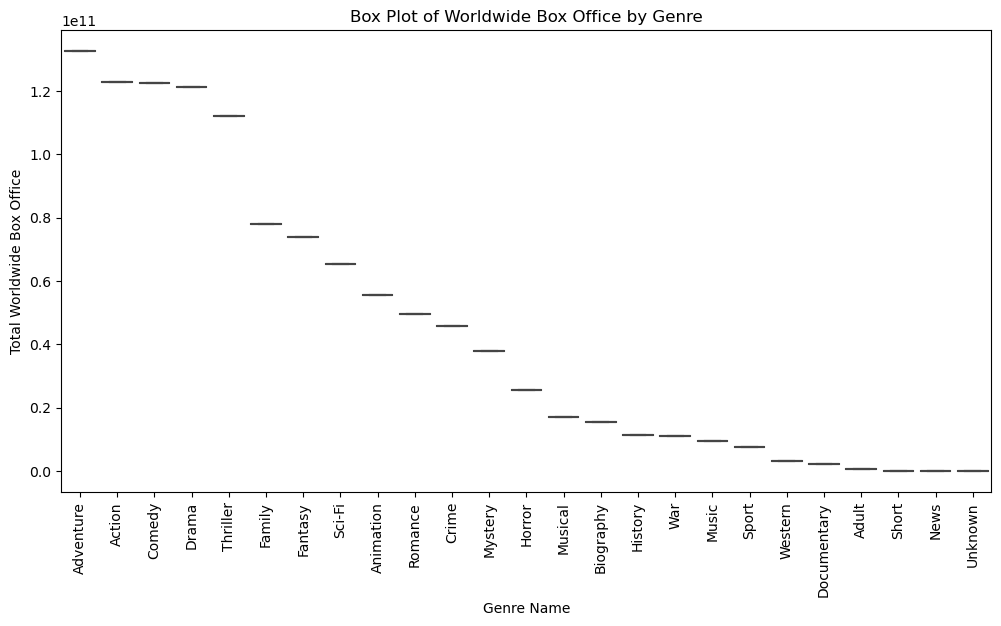

Kruskal-Wallis Test Results:
Test Statistic: 2.0
P-value: 0.36787944117144245
Fail to reject the null hypothesis: There is no significant difference in box office profitability among Comedy, Drama, and Action genres.


In [4]:
# Aleksandra 
# Worldwide box office and genre join
# Statistical analysis using box plot and Kruskal-Wallis test
# Sub-question 1 - What role does the choice of genre play in movies’ worldwide box office success?  
# Hypothesis 1 - The profitability at the box office is positively influenced by movies in genres like action, comedy and drama. 

import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define a function to get genre-wise worldwide box office data
def get_genre_box_office_data():
    # Connect to the PostgreSQL database
    conn = psycopg2.connect(
        host='localhost',
        database='DBmovies',
        port=5433,
        user='postgres',
        password='alex2000'
    )

# Create a cursor to interact with the database
    cursor = conn.cursor()

# Define the SQL query to find the genre with the highest worldwide box office revenue
    sql_query = """
        SELECT genres.genre_name, SUM(movies.worldwide_box_office) AS total_worldwide_box_office
        FROM genres
        JOIN moviegenrelink ON genres.genre_id = moviegenrelink.genre_id
        JOIN movies ON movies.movie_id = moviegenrelink.movie_id
        GROUP BY genres.genre_name
        ORDER BY total_worldwide_box_office DESC;
    """

    # Execute the SQL query
    cursor.execute(sql_query)

    # Fetch all the rows from the query
    rows = cursor.fetchall()

    # Create a DataFrame to store the results
    df = pd.DataFrame(rows, columns=["Genre Name", "Total Worldwide Box Office"])

    # Close the cursor and the database connection
    cursor.close()
    conn.close()

    # Return the DataFrame with the genre-wise box office data
    return df

# Calling the function to retrieve and print the data
if __name__ == "__main__":
    genre_box_office_data = get_genre_box_office_data()
    print(genre_box_office_data)

# Create a DataFrame using the retrieved data
df = genre_box_office_data

# Visualize the distribution of box office earnings by genre
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Genre Name", y="Total Worldwide Box Office")
plt.xticks(rotation=90)
plt.xlabel("Genre Name")
plt.ylabel("Total Worldwide Box Office")
plt.title("Box Plot of Worldwide Box Office by Genre")
plt.show()

# Extracting box office earnings data for three movie genres: Comedy, Drama, and Action
comedy_box_office = df[df['Genre Name'] == 'Comedy']['Total Worldwide Box Office']
drama_box_office = df[df['Genre Name'] == 'Drama']['Total Worldwide Box Office']
action_box_office = df[df['Genre Name'] == 'Action']['Total Worldwide Box Office']

# Perform Kruskal-Wallis test
# This test helps us figure out if there's a meaningful difference in box office earnings between these genres
statistic, p_value = stats.kruskal(comedy_box_office, drama_box_office, action_box_office)

# Setting a significance level (usually 0.05)
# We use this significance level to decide if the results are trustworthy or if they could be due to random chance
alpha = 0.05

# Print the Kruskal-Wallis test results
print("Kruskal-Wallis Test Results:")
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
# If the p-value is less than our significance level (0.05), we say the results are "significant" - It means there's a real difference in box office earnings among Comedy, Drama, and Action genres
# Which would support our hypothesis -
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in box office profitability among Comedy, Drama, and Action genres.")
else: # If the p-value is greater than our significance level, we don't have enough evidence to claim a difference
    print("Fail to reject the null hypothesis: There is no significant difference in box office profitability among Comedy, Drama, and Action genres.")



In [1]:
# Mike
# Worldwide box office and actors join
# Sub - question 2- How does the participation of certain actors affect the movie´s success?  
# Hypothesis 2 - Famous actors have a positive influence on a movie’s box office.   

import psycopg2
import pandas as pd

# Define a function to connect to the database
def connectDB():
    conn = psycopg2.connect(
        dbname="DBmovies",
        user="postgres",
        password="alex2000",
        host="localhost",
        port="5433")
    return conn

def getallAct(conn):
    dfAct = pd.read_sql("""
        SELECT actors.actor_name, SUM(worldwide_box_office) AS total_worldwide_box_office
        FROM actors
        JOIN actedin ON actors.actor_id = actedin.actor_id
        JOIN movies ON movies.movie_id = actedin.movie_id
        GROUP BY actors.actor_name
        ORDER BY total_worldwide_box_office DESC
    """, conn)
    return dfAct

# Call the function to connect to the database
conn = connectDB()
print("Connection success.")

# Get all actors box office
dfAct = getallAct(conn)
print(dfAct)

# Close connection
conn.close()
print("Connection closed.")

Connection success.
                  actor_name  total_worldwide_box_office
0                    Unknown                1.436091e+10
1             Dwayne Johnson                6.967288e+09
2                 Vin Diesel                5.887766e+09
3          Robert Downey Jr.                5.764598e+09
4         Scarlett Johansson                5.704360e+09
...                      ...                         ...
16566       Sorapong Chatree                0.000000e+00
16567             Nick Stahl                0.000000e+00
16568          AÃ¯ssa MaÃ¯ga                0.000000e+00
16569  James DeForest Parker                0.000000e+00
16570           Ann Petersen                0.000000e+00

[16571 rows x 2 columns]
Connection closed.


C:\Users\memwa\AppData\Local\Temp\ipykernel_15300\1552298267.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfDir = pd.read_sql("""


In [1]:
# Alvaro 
# Worldwide box office and costs grouping 
# Sub-question 3 - How does the participation of certain actors affect the movie´s success?  
# Hypothesis 3 - Production costs have no obvious positive effect on the worldwide box office success of movies.  


# Installing required libraries
import psycopg2
from sqlalchemy import create_engine
import pandas as pd  # Import pandas library

def analyze_movie_profit():
    # Defining the PostgreSQL database connection parameters
    db_config = {
        'dbname': 'DBmovies',
        'user': 'postgres',
        'password': 'alex2000',
        'host': 'localhost',
        'port': '5433'}

    # Establishing a connection using psycopg2
    conn = psycopg2.connect(**db_config)

    # Creating an SQLAlchemy engine using the connection
    engine = create_engine(f"postgresql+psycopg2://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['dbname']}")

    # Formulating the SQL query, here the profit of the top 10 movies is visualized
    sql_query = """SELECT movie_title, production_budget, worldwide_box_office,
                (worldwide_box_office - production_budget) AS profit,
                CASE
                WHEN worldwide_box_office > 0 THEN (production_budget / worldwide_box_office) * 100
                ELSE 0
                END AS percentage_production_cost
                FROM movies;"""

    # Executing the SQL query and fetching the results
    result = pd.read_sql(sql_query, conn)

    # Printing the results
    print(result)

    # Closing the database connection
    conn.close()

# Calling the function to analyze movie profit
analyze_movie_profit()


                       movie_title  production_budget  worldwide_box_office  \
0                     Bakha Satang                0.0               76576.0   
1                        Antitrust         30000000.0            17865209.0   
2                         Santitos                0.0                   0.0   
3                Frank McKlusky CI                0.0                   0.0   
4               A Walk to Remember         11000000.0            46060861.0   
...                            ...                ...                   ...   
30607       Jokbeoldu sinmun iyagi                0.0               12356.0   
30608             My Salinger Year                0.0              968849.0   
30609            Escort Vehicle 36                0.0              240000.0   
30610                      The Dry                0.0            17351923.0   
30611  Posledniy bogatyr Koren Zla                0.0            33396899.0   

           profit  percentage_production_cost  
0  

C:\Users\memwa\AppData\Local\Temp\ipykernel_1592\782994596.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql(sql_query, conn)


In [2]:
# Alvaro 
# Worldwide box office and costs grouping 
# Sub-question 3 - How does the participation of certain actors affect the movie´s success?  
# Hypothesis 3 - Production costs have no obvious positive effect on the worldwide box office success of movies.  


# Installing required libraries
import psycopg2
from sqlalchemy import create_engine
import pandas as pd  # (optional, for data manipulation)

def analyze_top_10_movie_profit():
    # Defining the PostgreSQL database connection parameters
    db_config = {
        'dbname': 'DBmovies',
        'user': 'postgres',
        'password': 'alex2000',
        'host': 'localhost',
        'port': '5433'}

    # Establishing a connection using psycopg2
    conn = psycopg2.connect(**db_config)

    # Creating an SQLAlchemy engine using the connection
    engine = create_engine(f"postgresql+psycopg2://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['dbname']}")

    # Formulating the SQL query, here the profit of the top 10 movies is visualized
    sql_query = """SELECT movie_title, production_budget, worldwide_box_office, 
                (worldwide_box_office - production_budget) AS profit,
                CASE
                WHEN worldwide_box_office > 0 THEN (production_budget / worldwide_box_office) * 100
                ELSE 0
                END AS percentage_production_cost
                FROM
                    movies
                ORDER BY
                    profit DESC LIMIT (10);"""

    # Executing the SQL query and fetching the results
    result = pd.read_sql(sql_query, conn) 

    # Printing the results 
    print(result)

    # Closing the database connection
    conn.close()

# Call the function to analyze the profit of the top 10 movies
analyze_top_10_movie_profit()


                          movie_title  production_budget  \
0                              Avatar        237000000.0   
1                    Avengers Endgame        400000000.0   
2  Star Wars Ep VII The Force Awakens        306000000.0   
3               Avengers Infinity War        300000000.0   
4               SpiderMan No Way Home        200000000.0   
5                      Jurassic World        215000000.0   
6                       The Lion King        260000000.0   
7                           Furious 7        190000000.0   
8                           Frozen II        150000000.0   
9                        The Avengers        225000000.0   

   worldwide_box_office        profit  percentage_production_cost  
0          2.845900e+09  2.608900e+09                    8.327771  
1          2.797801e+09  2.397801e+09                   14.296945  
2          2.064616e+09  1.758616e+09                   14.821159  
3          2.048360e+09  1.748360e+09                   14.645865  

C:\Users\memwa\AppData\Local\Temp\ipykernel_1592\283222202.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql(sql_query, conn)


In [6]:
# Lea 
# Worldwide box office and directors join
# Sub-question 4 - How does the choice of the director influence the success of a movie?  
# Hypothesis 4 - The financial success at the box office is positively influenced by the presence of well-known directors.  

import psycopg2
import pandas as pd

# Define a function to connect to database
def connectDB():
     conn = psycopg2.connect(
        dbname = "DBmovies",
        user = "postgres",
        password = "alex2000",
        host = "localhost",
        port = "5433")
     return conn 

# Query to select all directors with the average box office of the movies they directed by joining the tables
def getallDir(conn):
    dfDir = pd.read_sql("""SELECT directors.director_name, AVG(m.worldwide_box_office) AS AVG_worldwide_box_office
                            FROM movies m
                            JOIN directedby db ON m.movie_id = db.movie_id
                            JOIN directors ON db.director_id = directors.director_id
                            GROUP BY directors.director_name
                            ORDER BY AVG_worldwide_box_office DESC;""", conn)
    return dfDir

# call the function to connect to database
conn = connectDB()
print("Connection success.")

# get all directors with movies' box office
dfDir = getallDir(conn)
print(dfDir)

# Close connection
conn.close()

print("Connection closed.")

Connection success.
       director_name  avg_worldwide_box_office
0         Chris Buck              1.355390e+09
1         Kyle Balda              1.159631e+09
2        Josh Cooley              1.073080e+09
3        Lee Unkrich              1.068880e+09
4       Eric Guillon              1.032962e+09
...              ...                       ...
4303   Ellen Osborne              0.000000e+00
4304  Jennifer Kroot              0.000000e+00
4305     Erik Canuel              0.000000e+00
4306  Julia Reichert              0.000000e+00
4307      Paul Hough              0.000000e+00

[4308 rows x 2 columns]
Connection closed.


C:\Users\memwa\AppData\Local\Temp\ipykernel_13144\899601772.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfDir = pd.read_sql("""SELECT directors.director_name, AVG(m.worldwide_box_office) AS AVG_worldwide_box_office


DataFrame:
    Ratings  Total Worldwide Box Office
0      10.0                1.287286e+13
1       8.0                7.579207e+12
2       9.0                7.331093e+12
3       7.0                6.103368e+12
4       6.0                4.535870e+12
..      ...                         ...
90      1.9                9.586500e+05
91      0.9                0.000000e+00
92      1.3                0.000000e+00
93      1.4                0.000000e+00
94      0.1                0.000000e+00

[95 rows x 2 columns]
Correlation between Ratings and Total Worldwide Box Office: 0.19006103780009306


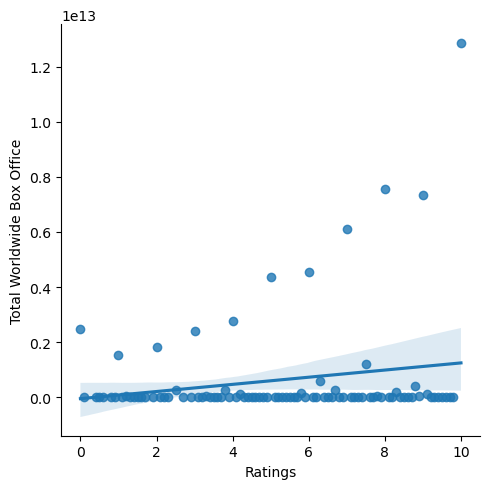

In [5]:
# Jaume
# Reviews and Boxoffice Sales JOIN
# Sub-question 5 - How do the feelings evoked from the film affect the income the movie gets?
# Hypothesis 5 - Feelings play a huge role in the success of films at the box office. Films able to engage with the audience positively make bigger box offices.  

# Importing the required libraries, which are pandas for data manipulation and psycopg2 for connecting to the PostgreSQL database

import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_ratings_vs_box_office():
    try:
        # Establish a database connection
        conn = psycopg2.connect(
            host='localhost',
            database='DBmovies',
            port=5433,
            user='postgres',
            password='alex2000'
        )

        # Create a cursor to interact with the database
        cursor = conn.cursor()

        # Define the SQL query
        sql_query = """
            SELECT reviews.rating, SUM(movies.worldwide_box_office) as TOTAL_SALES 
            FROM reviews
            JOIN movies ON reviews.movie_id = movies.movie_id
            GROUP BY reviews.rating
            ORDER BY TOTAL_SALES DESC;
        """

        # Executing the query
        cursor.execute(sql_query)

        # Fetching all the rows
        rows = cursor.fetchall()

        # Creating a DataFrame
        dfRatingsSales = pd.DataFrame(rows, columns=["Ratings", "Total Worldwide Box Office"])

        # Calculating the correlation
        correlation = dfRatingsSales.corr().iloc[0, 1]

        # Creating a scatterplot to visualize the correlation
        sns.lmplot(x="Ratings", y="Total Worldwide Box Office", data=dfRatingsSales)

        # Displaying the dataframe
        print("DataFrame:")
        print(dfRatingsSales)

        # Displaying the correlation
        print(f"Correlation between Ratings and Total Worldwide Box Office: {correlation}")

        # Showing the scatterplot
        plt.show()

    except Exception as e:
        print(f"Error: {str(e)}")

    finally:
        # Closing the cursor and database connection
        cursor.close()
        conn.close()

# Calling the function to analyze ratings vs. box office sales
analyze_ratings_vs_box_office()



Connection success.
      rel_date  total_box_office  box_office_percentage
0    December       7.430566e+10              13.640954
1    November       6.223563e+10              11.425151
2        July       6.017057e+10              11.046049
3         May       5.790200e+10              10.629587
4        June       5.656158e+10              10.383515
5       March       3.898026e+10               7.155954
6      August       3.659018e+10               6.717187
7     October       3.605583e+10               6.619091
8    February       3.536805e+10               6.492830
9       April       3.468781e+10               6.367951
10  September       2.830204e+10               5.195658
11    January       2.334641e+10               4.285910
Connection closed.
Connection success.
Connection closed.


C:\Users\memwa\AppData\Local\Temp\ipykernel_13144\3297723789.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfRelPer = pd.read_sql("""SELECT rel_date,
C:\Users\memwa\AppData\Local\Temp\ipykernel_13144\3297723789.py:65: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfRel = pd.read_sql("""


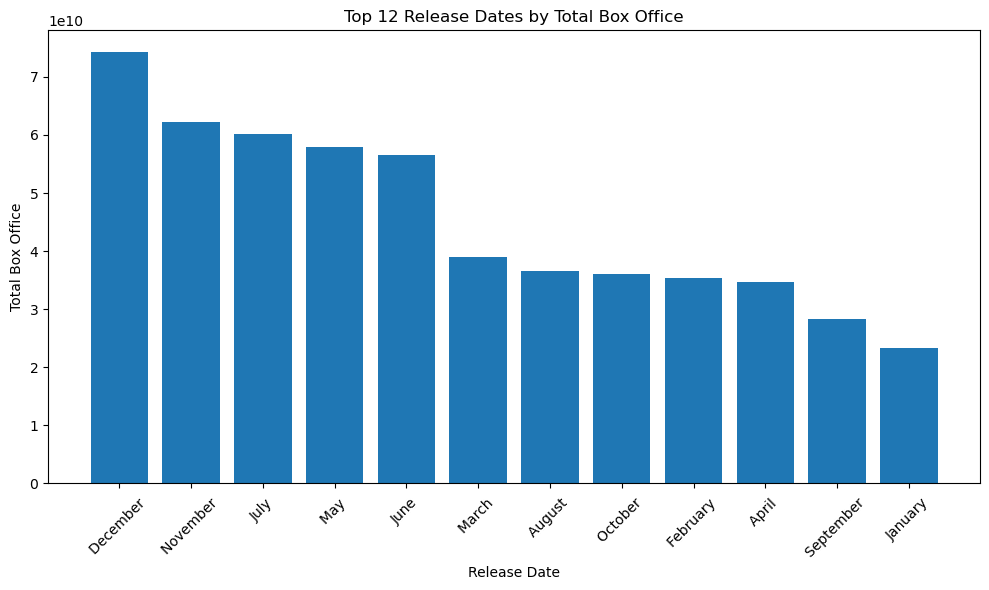

In [7]:
# Lea - box office + release date 
# Define a function to connect to database
# Sub-question 6 - How does the release date influence the worldwide box office? 
# Hypothesis 6 - The financial success of a movie is positively affected by releasing it during a holiday season, leading to higher worldwide box office revenue compared to releasing the same movie on a non-holiday day.  

import psycopg2
import pandas as pd

def connectDB():
     conn = psycopg2.connect(
        dbname = "DBmovies",
        user = "postgres",
        password = "alex2000",
        host = "localhost",
        port = "5433")
     return conn 

# Query to select the total box office per release date (month) as percentage 
def getsuccrelper(conn):
    dfRelPer = pd.read_sql("""SELECT rel_date,
                            SUM(worldwide_box_office) AS total_box_office,
                            SUM(worldwide_box_office) / (SELECT SUM(worldwide_box_office) FROM movies) * 100 AS box_office_percentage
                            FROM movies
                            GROUP BY rel_date
                            ORDER BY total_box_office DESC LIMIT(12);""", conn)
    return dfRelPer

# call the function to connect to database
conn = connectDB()
print("Connection success.")

# get back query result
dfRel = getsuccrelper(conn)
print(dfRel)

# Close connection
conn.close()

print("Connection closed.")

# Lea - relase data + worldwide box office - visualisation

import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# Function to connect to the database
def connectDB():
    try:
        conn = psycopg2.connect(
            dbname="DBmovies",
            user="postgres",
            password="alex2000",
            host="localhost",
            port="5433"
        )
        print("Connection success.")
        return conn
    except psycopg2.Error as e:
        print("Error connecting to the database:", e)
        return None

# Function to retrieve data from the database
def getsuccrel(conn):
    if conn is not None:
        try:
            dfRel = pd.read_sql("""
                SELECT rel_date, SUM(worldwide_box_office) AS SUM_worldwide_box_office
                FROM movies
                GROUP BY rel_date
                ORDER BY SUM_worldwide_box_office DESC
                LIMIT (12);
            """, conn)
            return dfRel
        except psycopg2.Error as e:
            print("Error executing SQL query:", e)
            return None
    else:
        return None

# Connect to the database
conn = connectDB()

# Get data from the database
if conn is not None:
    dfRel = getsuccrel(conn)
    
    # Close the database connection
    conn.close()
    print("Connection closed.")

    if dfRel is not None:
        # Create a bar graph
        plt.figure(figsize=(10, 6))
        plt.bar(dfRel['rel_date'], dfRel['sum_worldwide_box_office'])  # Use lowercase column name
        plt.xlabel('Release Date')
        plt.ylabel('Total Box Office')
        plt.title('Top 12 Release Dates by Total Box Office')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.tight_layout()

        # Show the graph
        plt.show()
    else:
        print("No data retrieved from the database.")
else:
    print("Connection to the database failed.")


In [8]:
# Alvaro - ratings and wroldwide box office join
# Sub-question 7 - What role does the choice of rating play in movies’ worldwide box office success?
# Hypothesis 7 - The profitability at the box office is positively influenced by movies with ratings of G, PG, and PG-13.

import pandas as pd
import psycopg2

def analyze_movie_ratings():
    try:
        # Define database connection parameters
        conn = psycopg2.connect(
            dbname="DBmovies",
            user="postgres",
            password="alex2000",
            host="localhost",
            port="5433"
        )

        # Create a cursor to interact with the database
        cursor = conn.cursor()

        # Define the SQL query for joining movie ratings and average box office sales
        sql_query = """
            SELECT ratings.rating_name, AVG(movies.worldwide_box_office) AS average_worldwide_box_office
            FROM ratings
            JOIN movierating ON movierating.rating_id = ratings.rating_id
            JOIN movies ON movies.movie_id = movierating.movie_id
            GROUP BY ratings.rating_name
            ORDER BY average_worldwide_box_office DESC;
        """

        # Execute the SQL query
        cursor.execute(sql_query)

        # Fetch all the rows
        rows = cursor.fetchall()

        # Create a DataFrame with column names
        df = pd.DataFrame(rows, columns=["Rating Name", "Average Worldwide Box Office"])

        # Display the DataFrame
        print("DataFrame:")
        print(df)

    except Exception as e:
        print(f"Error: {str(e)}")

    finally:
        # Close the cursor and database connection
        cursor.close()
        conn.close()

# Call the function to analyze movie ratings and box office sales
analyze_movie_ratings()

DataFrame:
   Rating Name  Average Worldwide Box Office
0         TV-G                  3.909169e+08
1            G                  1.414622e+08
2           PG                  1.328172e+08
3        PG-13                  9.190977e+07
4        TV-PG                  4.220463e+07
5        TV-14                  3.226884e+07
6            R                  3.082020e+07
7      Unrated                  2.783629e+07
8        NC-17                  2.754727e+07
9        TV-MA                  6.295526e+06
10      PG--13                  3.743188e+06
11        Open                  3.275846e+06
12   Not Rated                  2.320054e+06
13          NR                  1.821420e+06
14       MA-17                  1.155873e+06
15    Approved                  1.119040e+05
16        M/PG                  0.000000e+00


C:\Users\memwa\AppData\Local\Temp\ipykernel_10620\3417457773.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(sql_query, conn)


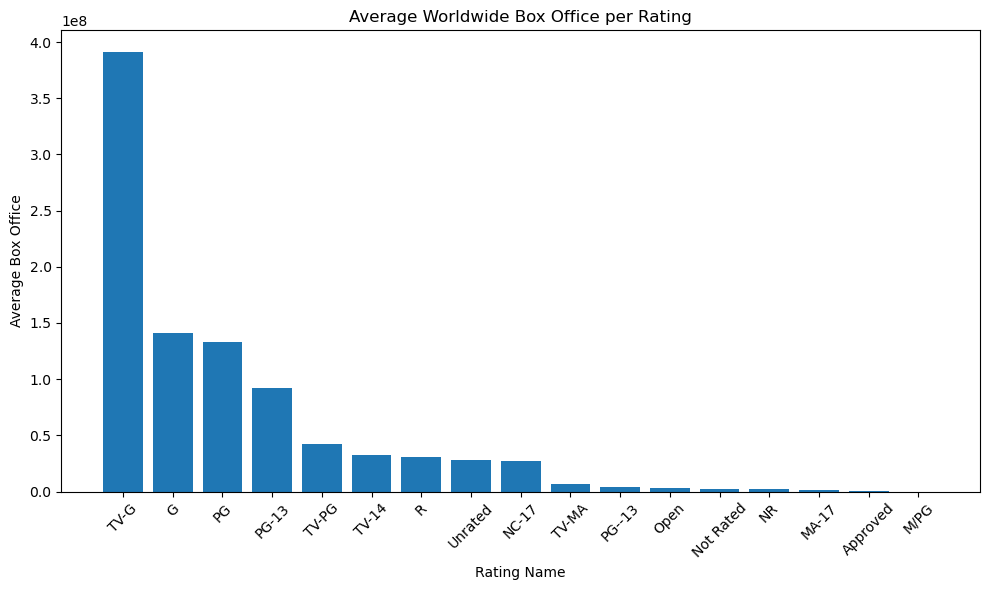

In [1]:
# Alvaro - ratings and wroldwide box office join - visualisation
# Sub-question 7 - What role does the choice of rating play in movies’ worldwide box office success?
# Hypothesis 7 - The profitability at the box office is positively influenced by movies with ratings of G, PG, and PG-13.

import psycopg2
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_box_office_by_rating():
    # Define the PostgreSQL database connection parameters
    db_config = {
        'dbname': 'DBmovies',
        'user': 'postgres',
        'password': 'alex2000',
        'host': 'localhost',
        'port': '5433'
    }

    try:
        # Establish a connection using psycopg2
        conn = psycopg2.connect(**db_config)

        # Create an SQLAlchemy engine using the connection
        engine = create_engine(f"postgresql+psycopg2://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['dbname']}")

        # Formulate the SQL query of the joined table
        sql_query = """
            SELECT ratings.rating_name, AVG(movies.worldwide_box_office) AS average_worldwide_box_office
            FROM ratings
            JOIN movierating on movierating.rating_id = ratings.rating_id
            JOIN movies on movies.movie_id = movierating.movie_id
            GROUP BY ratings.rating_name
            ORDER BY average_worldwide_box_office DESC;"""

        # Execute the SQL query and fetch the results
        result = pd.read_sql_query(sql_query, conn)

        # Create a bar plot to visualize the data
        plt.figure(figsize=(10, 6))
        plt.bar(result['rating_name'], result['average_worldwide_box_office'])
        plt.xlabel('Rating Name')
        plt.ylabel('Average Box Office')
        plt.title('Average Worldwide Box Office per Rating')
        plt.xticks(rotation=45)
        plt.tight_layout()

        # Show the plot
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        # Close the database connection
        if conn:
            conn.close()

# Call the function to generate the plot
plot_average_box_office_by_rating()
